In [1]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()

# Set the root directory of your project
project_root = '/Users/rodolfocacacho/Documents/Documents/MAI/Master Thesis/Code/rag_project'

# Add the root directory to sys.path
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
import os
from utils.pinecone_hybrid_connector import PineconeDBConnectorHybrid
from utils.MySQLDB_manager import MySQLDB
from utils.chunking_embedding import config as process_and_upload,embedding_bm25_calculation
from config import DB_NAME,CONFIG_SQL_DB
from utils.embedding_handler import EmbeddingHandler
from dotenv import load_dotenv

load_dotenv()

API_PINE_CONE = os.getenv('API_PINE_CONE')

root_dir = '/Users/rodolfocacacho/Documents/Documents/MAI/Master Thesis/Code/rag_clean_v2'
original_dir = os.getcwd()
os.chdir(root_dir)

output_dir = 'data/storage/tables'

# SQL Tables
table_documents_name = 'table_documents'

max_tokens = 500
suffix = 'clean'
sql_chunks_table = f'chunks_table_{suffix}_{max_tokens}'
sql_table_vocab = f'vocabulary_bm25_{suffix}_{max_tokens}'


sql_con = MySQLDB(config=CONFIG_SQL_DB,database_name=DB_NAME)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rodolfocacacho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
upsert_list = embedding_bm25_calculation(sql_con=sql_con,
                                        table_name=sql_chunks_table,
                                        table_store=sql_table_vocab)

Data retrieved from database table 'chunks_table_clean_500'.


In [4]:
embed_model = "jinaai/jina-embeddings-v2-base-de"
embed_model_name = embed_model.split("/")[1]

model_dimension = 768

index_name = f'{embed_model_name}-{suffix}-{max_tokens}'

vec_con = PineconeDBConnectorHybrid(api_key=API_PINE_CONE,
                                    index_name=index_name,
                                    embedding_model_name_dense=embed_model,
                                    dimension=model_dimension)


embedding_handler = EmbeddingHandler(
    model_name=embed_model,  # Replace with your transformer model
    use_api=False,  # Set to True if using API
)

process_and_upload(chunks=upsert_list,
                   pinecone_connector=vec_con,
                   embedding_handler=embedding_handler,
                   use_sparse=True
                   )


TypeError: PineconeDBConnectorHybrid.__init__() got an unexpected keyword argument 'embedding_model_name_dense'

In [ ]:
embed_model = "jinaai/jina-embeddings-v3"
embed_model_name = embed_model.split("/")[1]
model_dimension = 1024

index_name = f'{embed_model_name}-{suffix}-{max_tokens}'

vec_con = PineconeDBConnectorHybrid(api_key=API_PINE_CONE,
                                    index_name=index_name,
                                    embedding_model_name_dense=embed_model,
                                    dimension=model_dimension)

embedding_handler = EmbeddingHandler(
    model_name=embed_model,  # Replace with your transformer model
    use_api=False,  # Set to True if using API
    task = 'retrieval.passage'
)

process_and_upload(chunks=upsert_list,
                   pinecone_connector=vec_con,
                   embedding_handler=embedding_handler,
                   use_sparse=True
                   )

Embedding Dimension: 1024
Using existing Pinecone index: jina-embeddings-v3-clean-250


mha.py:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

rotary.py:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mha.py
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


block.py:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

stochastic_depth.py:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- stochastic_depth.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


mlp.py:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mlp.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- block.py
- stochastic_depth.py
- mlp.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_xlm_roberta.py:   0%|          | 0.00/50.0k [00:00<?, ?B/s]

embedding.py:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- modeling_xlm_roberta.py
- embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- xlm_padding.py
- mha.py
- block.py
- modeling_xlm_roberta.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/192 [00:00<?, ?B/s]

Processing Batches:   0%|          | 0/108 [00:00<?, ?batch/s]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   1%|          | 1/108 [00:56<1:40:36, 56.42s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   2%|▏         | 2/108 [01:45<1:31:55, 52.04s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   3%|▎         | 3/108 [02:30<1:25:12, 48.69s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   4%|▎         | 4/108 [03:12<1:20:07, 46.23s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   5%|▍         | 5/108 [03:55<1:17:32, 45.17s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   6%|▌         | 6/108 [04:40<1:16:39, 45.09s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   6%|▋         | 7/108 [05:26<1:16:03, 45.18s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   7%|▋         | 8/108 [06:12<1:16:10, 45.70s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   8%|▊         | 9/108 [06:55<1:13:44, 44.69s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   9%|▉         | 10/108 [07:39<1:12:54, 44.63s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  10%|█         | 11/108 [08:23<1:11:48, 44.42s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  11%|█         | 12/108 [09:06<1:10:20, 43.96s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  12%|█▏        | 13/108 [09:49<1:08:58, 43.56s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  13%|█▎        | 14/108 [10:31<1:07:25, 43.04s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  14%|█▍        | 15/108 [11:12<1:05:47, 42.44s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  15%|█▍        | 16/108 [11:54<1:04:50, 42.28s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  16%|█▌        | 17/108 [12:37<1:04:26, 42.49s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  17%|█▋        | 18/108 [13:19<1:03:26, 42.30s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  18%|█▊        | 19/108 [14:01<1:02:52, 42.38s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  19%|█▊        | 20/108 [14:43<1:01:59, 42.26s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  19%|█▉        | 21/108 [15:29<1:02:47, 43.30s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  20%|██        | 22/108 [16:14<1:02:55, 43.90s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  21%|██▏       | 23/108 [17:03<1:04:05, 45.24s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  22%|██▏       | 24/108 [17:49<1:03:49, 45.58s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  23%|██▎       | 25/108 [18:36<1:03:48, 46.13s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  24%|██▍       | 26/108 [19:24<1:03:42, 46.62s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  25%|██▌       | 27/108 [20:07<1:01:32, 45.59s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  26%|██▌       | 28/108 [20:51<1:00:11, 45.14s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  27%|██▋       | 29/108 [21:37<59:36, 45.27s/batch]  

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  28%|██▊       | 30/108 [22:22<58:46, 45.21s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  29%|██▊       | 31/108 [23:15<1:00:55, 47.48s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  30%|██▉       | 32/108 [24:05<1:01:10, 48.29s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  31%|███       | 33/108 [24:57<1:01:48, 49.44s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  31%|███▏      | 34/108 [25:51<1:02:37, 50.78s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  32%|███▏      | 35/108 [26:37<1:00:05, 49.39s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  33%|███▎      | 36/108 [27:31<1:01:03, 50.88s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  34%|███▍      | 37/108 [28:31<1:03:15, 53.46s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  35%|███▌      | 38/108 [29:31<1:04:44, 55.50s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  36%|███▌      | 39/108 [30:26<1:03:40, 55.37s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  37%|███▋      | 40/108 [31:19<1:01:46, 54.50s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  38%|███▊      | 41/108 [32:04<57:41, 51.67s/batch]  

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  39%|███▉      | 42/108 [32:47<54:01, 49.12s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  40%|███▉      | 43/108 [33:32<51:52, 47.88s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  41%|████      | 44/108 [34:22<51:38, 48.41s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  42%|████▏     | 45/108 [35:10<50:47, 48.37s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  43%|████▎     | 46/108 [35:55<48:50, 47.27s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  44%|████▎     | 47/108 [36:40<47:22, 46.59s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  44%|████▍     | 48/108 [37:25<46:17, 46.29s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  45%|████▌     | 49/108 [38:12<45:31, 46.29s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  46%|████▋     | 50/108 [38:56<44:21, 45.88s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  47%|████▋     | 51/108 [39:45<44:21, 46.68s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  48%|████▊     | 52/108 [40:32<43:37, 46.73s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  49%|████▉     | 53/108 [41:15<41:51, 45.66s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  50%|█████     | 54/108 [42:00<40:50, 45.39s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  51%|█████     | 55/108 [42:43<39:28, 44.69s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  52%|█████▏    | 56/108 [43:24<37:43, 43.52s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  53%|█████▎    | 57/108 [44:07<36:51, 43.36s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  54%|█████▎    | 58/108 [44:48<35:43, 42.86s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  55%|█████▍    | 59/108 [45:33<35:26, 43.40s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  56%|█████▌    | 60/108 [46:20<35:40, 44.59s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  56%|█████▋    | 61/108 [47:01<34:02, 43.46s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  57%|█████▋    | 62/108 [47:46<33:40, 43.92s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  58%|█████▊    | 63/108 [48:27<32:11, 42.93s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  59%|█████▉    | 64/108 [49:08<31:05, 42.39s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  60%|██████    | 65/108 [49:51<30:36, 42.71s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  61%|██████    | 66/108 [50:33<29:43, 42.45s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  62%|██████▏   | 67/108 [51:14<28:35, 41.84s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  63%|██████▎   | 68/108 [51:57<28:09, 42.24s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  64%|██████▍   | 69/108 [52:48<29:17, 45.07s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  65%|██████▍   | 70/108 [53:34<28:38, 45.23s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  66%|██████▌   | 71/108 [54:22<28:20, 45.95s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  67%|██████▋   | 72/108 [55:08<27:34, 45.97s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  68%|██████▊   | 73/108 [55:57<27:23, 46.96s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  69%|██████▊   | 74/108 [56:48<27:17, 48.16s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  69%|██████▉   | 75/108 [57:37<26:41, 48.54s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  70%|███████   | 76/108 [58:24<25:38, 48.09s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  71%|███████▏  | 77/108 [59:09<24:14, 46.91s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  72%|███████▏  | 78/108 [59:54<23:09, 46.32s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  73%|███████▎  | 79/108 [1:00:38<22:07, 45.79s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  74%|███████▍  | 80/108 [1:01:23<21:17, 45.62s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  75%|███████▌  | 81/108 [1:02:08<20:20, 45.21s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  76%|███████▌  | 82/108 [1:02:53<19:38, 45.32s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  77%|███████▋  | 83/108 [1:03:44<19:34, 46.96s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  78%|███████▊  | 84/108 [1:04:31<18:49, 47.07s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  79%|███████▊  | 85/108 [1:05:20<18:15, 47.63s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  80%|███████▉  | 86/108 [1:06:08<17:28, 47.67s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  81%|████████  | 87/108 [1:06:53<16:23, 46.83s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  81%|████████▏ | 88/108 [1:07:40<15:40, 47.00s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  82%|████████▏ | 89/108 [1:08:28<14:58, 47.28s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  83%|████████▎ | 90/108 [1:09:19<14:28, 48.23s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  84%|████████▍ | 91/108 [1:10:04<13:24, 47.31s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  85%|████████▌ | 92/108 [1:10:49<12:24, 46.55s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  86%|████████▌ | 93/108 [1:11:36<11:44, 46.97s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  87%|████████▋ | 94/108 [1:12:22<10:49, 46.42s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  88%|████████▊ | 95/108 [1:13:06<09:53, 45.69s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  89%|████████▉ | 96/108 [1:13:46<08:50, 44.17s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  90%|████████▉ | 97/108 [1:14:31<08:07, 44.28s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  91%|█████████ | 98/108 [1:15:17<07:29, 44.95s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  92%|█████████▏| 99/108 [1:16:01<06:40, 44.48s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  93%|█████████▎| 100/108 [1:16:48<06:02, 45.35s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  94%|█████████▎| 101/108 [1:17:30<05:10, 44.34s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  94%|█████████▍| 102/108 [1:18:13<04:23, 43.97s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  95%|█████████▌| 103/108 [1:18:58<03:41, 44.34s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  96%|█████████▋| 104/108 [1:19:51<03:07, 46.84s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  97%|█████████▋| 105/108 [1:20:47<02:28, 49.53s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  98%|█████████▊| 106/108 [1:21:45<01:44, 52.09s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  99%|█████████▉| 107/108 [1:22:40<00:52, 53.00s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches: 100%|██████████| 108/108 [1:23:08<00:00, 46.19s/batch]

Uploaded batch 1/1
All batches uploaded successfully.


In [ ]:
embed_model = "aari1995/German_Semantic_V3"
embed_model_name = embed_model.split("/")[1].replace('_','-').lower()
model_dimension = 1024

index_name = f'{embed_model_name}-{suffix}-{max_tokens}'

vec_con = PineconeDBConnectorHybrid(api_key=API_PINE_CONE,
                                    index_name=index_name,
                                    embedding_model_name_dense=embed_model,
                                    dimension=model_dimension)


embedding_handler = EmbeddingHandler(
    model_name=embed_model,  # Replace with your transformer model
    use_api=False,  # Set to True if using API
)

process_and_upload(chunks=upsert_list,
                   pinecone_connector=vec_con,
                   embedding_handler=embedding_handler,
                   use_sparse=True
                   )


Embedding Dimension: 1024
Created new Pinecone index: german-semantic-v3-clean-250


Processing Batches:   0%|          | 0/108 [00:00<?, ?batch/s]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   1%|          | 1/108 [00:26<46:24, 26.03s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   2%|▏         | 2/108 [00:44<37:50, 21.42s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   3%|▎         | 3/108 [01:15<45:41, 26.11s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   4%|▎         | 4/108 [01:33<39:36, 22.85s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   5%|▍         | 5/108 [01:51<36:06, 21.03s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   6%|▌         | 6/108 [02:09<33:48, 19.89s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   6%|▋         | 7/108 [02:27<32:39, 19.40s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   7%|▋         | 8/108 [02:47<32:47, 19.68s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   8%|▊         | 9/108 [03:05<31:36, 19.16s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:   9%|▉         | 10/108 [03:24<30:50, 18.89s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  10%|█         | 11/108 [03:43<30:40, 18.97s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  11%|█         | 12/108 [04:03<31:07, 19.45s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  12%|█▏        | 13/108 [04:20<29:37, 18.71s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  13%|█▎        | 14/108 [04:37<28:12, 18.00s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  14%|█▍        | 15/108 [04:54<27:26, 17.70s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  15%|█▍        | 16/108 [05:16<29:03, 18.95s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  16%|█▌        | 17/108 [05:35<28:45, 18.97s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  17%|█▋        | 18/108 [05:59<30:53, 20.60s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  18%|█▊        | 19/108 [06:17<29:24, 19.82s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  19%|█▊        | 20/108 [06:38<29:38, 20.21s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  19%|█▉        | 21/108 [06:58<29:00, 20.01s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  20%|██        | 22/108 [07:21<30:00, 20.94s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  21%|██▏       | 23/108 [07:39<28:26, 20.08s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  22%|██▏       | 24/108 [07:57<27:10, 19.41s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  23%|██▎       | 25/108 [08:17<27:21, 19.77s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  24%|██▍       | 26/108 [08:35<26:13, 19.19s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  25%|██▌       | 27/108 [08:54<25:36, 18.97s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  26%|██▌       | 28/108 [09:11<24:47, 18.59s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  27%|██▋       | 29/108 [09:30<24:41, 18.75s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  28%|██▊       | 30/108 [09:50<24:31, 18.86s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  29%|██▊       | 31/108 [10:10<24:54, 19.41s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  30%|██▉       | 32/108 [10:29<24:22, 19.25s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  31%|███       | 33/108 [10:47<23:36, 18.89s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  31%|███▏      | 34/108 [11:06<23:08, 18.76s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  32%|███▏      | 35/108 [11:25<23:00, 18.90s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  33%|███▎      | 36/108 [11:45<23:00, 19.18s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  34%|███▍      | 37/108 [12:04<22:34, 19.08s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  35%|███▌      | 38/108 [12:21<21:44, 18.64s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  36%|███▌      | 39/108 [12:42<22:20, 19.43s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  37%|███▋      | 40/108 [13:01<21:36, 19.06s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  38%|███▊      | 41/108 [13:19<21:03, 18.85s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  39%|███▉      | 42/108 [13:38<20:37, 18.75s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  40%|███▉      | 43/108 [13:57<20:39, 19.07s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  41%|████      | 44/108 [14:18<20:55, 19.61s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  42%|████▏     | 45/108 [14:36<20:04, 19.12s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  43%|████▎     | 46/108 [14:54<19:25, 18.79s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  44%|████▎     | 47/108 [15:16<20:03, 19.74s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  44%|████▍     | 48/108 [15:35<19:24, 19.41s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  45%|████▌     | 49/108 [15:53<18:40, 18.99s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  46%|████▋     | 50/108 [16:10<17:50, 18.45s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  47%|████▋     | 51/108 [16:29<17:34, 18.50s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  48%|████▊     | 52/108 [16:49<17:45, 19.03s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  49%|████▉     | 53/108 [17:10<18:02, 19.68s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  50%|█████     | 54/108 [17:29<17:22, 19.31s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  51%|█████     | 55/108 [17:47<16:50, 19.07s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  52%|█████▏    | 56/108 [18:08<16:58, 19.58s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  53%|█████▎    | 57/108 [18:27<16:31, 19.44s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  54%|█████▎    | 58/108 [18:47<16:22, 19.66s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  55%|█████▍    | 59/108 [19:06<15:59, 19.58s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  56%|█████▌    | 60/108 [19:29<16:20, 20.43s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  56%|█████▋    | 61/108 [19:48<15:41, 20.03s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  57%|█████▋    | 62/108 [20:08<15:18, 19.97s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  58%|█████▊    | 63/108 [20:31<15:37, 20.83s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  59%|█████▉    | 64/108 [20:50<15:02, 20.51s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  60%|██████    | 65/108 [21:09<14:17, 19.95s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  61%|██████    | 66/108 [21:32<14:31, 20.74s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  62%|██████▏   | 67/108 [21:51<13:57, 20.43s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  63%|██████▎   | 68/108 [22:11<13:25, 20.13s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  64%|██████▍   | 69/108 [22:31<13:07, 20.19s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  65%|██████▍   | 70/108 [22:51<12:45, 20.15s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  66%|██████▌   | 71/108 [23:10<12:13, 19.84s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  67%|██████▋   | 72/108 [23:31<11:58, 19.96s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  68%|██████▊   | 73/108 [23:54<12:16, 21.05s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  69%|██████▊   | 74/108 [24:14<11:40, 20.61s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  69%|██████▉   | 75/108 [24:34<11:14, 20.43s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  70%|███████   | 76/108 [24:56<11:12, 21.03s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  71%|███████▏  | 77/108 [25:15<10:31, 20.37s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  72%|███████▏  | 78/108 [25:35<10:05, 20.19s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  73%|███████▎  | 79/108 [25:56<09:57, 20.59s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  74%|███████▍  | 80/108 [26:15<09:16, 19.88s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  75%|███████▌  | 81/108 [26:35<09:01, 20.07s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  76%|███████▌  | 82/108 [26:58<09:03, 20.92s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  77%|███████▋  | 83/108 [27:18<08:35, 20.60s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  78%|███████▊  | 84/108 [27:40<08:28, 21.20s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  79%|███████▊  | 85/108 [28:01<08:00, 20.87s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  80%|███████▉  | 86/108 [28:21<07:34, 20.64s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  81%|████████  | 87/108 [28:42<07:20, 20.99s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  81%|████████▏ | 88/108 [29:03<06:58, 20.94s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  82%|████████▏ | 89/108 [29:24<06:34, 20.77s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  83%|████████▎ | 90/108 [29:47<06:30, 21.71s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  84%|████████▍ | 91/108 [30:09<06:06, 21.56s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  85%|████████▌ | 92/108 [30:30<05:44, 21.54s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  86%|████████▌ | 93/108 [30:55<05:35, 22.37s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  87%|████████▋ | 94/108 [31:16<05:09, 22.10s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  88%|████████▊ | 95/108 [31:37<04:41, 21.68s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  89%|████████▉ | 96/108 [32:00<04:26, 22.18s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  90%|████████▉ | 97/108 [32:21<03:58, 21.68s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  91%|█████████ | 98/108 [32:41<03:32, 21.27s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  92%|█████████▏| 99/108 [33:03<03:14, 21.65s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  93%|█████████▎| 100/108 [33:24<02:50, 21.29s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  94%|█████████▎| 101/108 [33:44<02:26, 20.92s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  94%|█████████▍| 102/108 [34:05<02:06, 21.04s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  95%|█████████▌| 103/108 [34:26<01:44, 20.83s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  96%|█████████▋| 104/108 [34:53<01:31, 22.80s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  97%|█████████▋| 105/108 [35:21<01:13, 24.36s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  98%|█████████▊| 106/108 [35:46<00:49, 24.50s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches:  99%|█████████▉| 107/108 [36:09<00:24, 24.16s/batch]

Uploaded batch 1/1
Uploaded batch 1/1
Uploaded batch 1/1


Processing Batches: 100%|██████████| 108/108 [36:21<00:00, 20.20s/batch]

Uploaded batch 1/1
All batches uploaded successfully.


In [ ]:
embed_model = "intfloat/multilingual-e5-large-instruct"
embed_model_name = embed_model.split("/")[1]
model_dimension = 1024

index_name = f'{embed_model_name}-{suffix}-{max_tokens}'

vec_con = PineconeDBConnectorHybrid(api_key=API_PINE_CONE,
                                    index_name=index_name,
                                    embedding_model_name_dense=embed_model,
                                    dimension=model_dimension)


embedding_handler = EmbeddingHandler(
    model_name=embed_model,  # Replace with your transformer model
    use_api=False,  # Set to True if using API
)

process_and_upload(chunks=upsert_list,
                   pinecone_connector=vec_con,
                   embedding_handler=embedding_handler,
                   use_sparse=True
                   )


Embedding Dimension: 1024
Created new Pinecone index: multilingual-e5-large-instruct-clean-250


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/140k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

Processing Batches: 100%|██████████| 108/108 [34:49<00:00, 19.35s/batch]

All batches uploaded successfully.


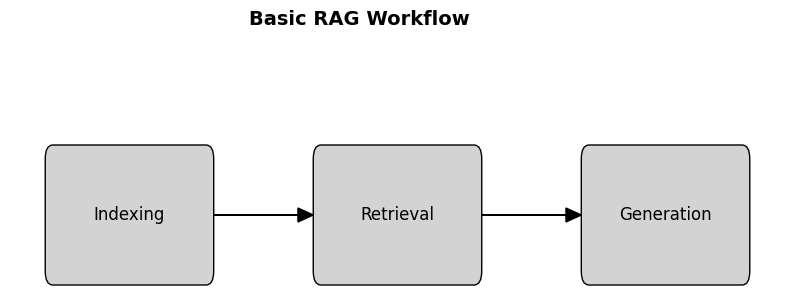

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis("off")

# Draw rectangles
def draw_box(ax, x, y, text, width=2, height=0.8, color="lightgrey"):
    box = FancyBboxPatch((x, y), width, height, boxstyle="round,pad=0.1", ec="black", fc=color)
    ax.add_patch(box)
    ax.text(x + width / 2, y + height / 2, text, ha="center", va="center", fontsize=12)

# Draw arrows outside the boxes
def draw_arrow(ax, x_start, y_start, x_end, y_end):
    ax.arrow(x_start, y_start, x_end - x_start, y_end - y_start,
             head_width=0.1, head_length=0.2, fc="black", ec="black", length_includes_head=True)

# Positioning for boxes
x_positions = [1, 4.5, 8]
y_position = 1
texts = ["Indexing", "Retrieval", "Generation"]

# Draw the boxes and text
for i, text in enumerate(texts):
    draw_box(ax, x_positions[i], y_position, text)

# Draw the arrows outside the boxes (adjusted positioning)
arrow_start = y_position + 0.4  # Arrow height
arrow_end = arrow_start
for i in range(len(x_positions) - 1):
    draw_arrow(ax, x_positions[i] + 2.1, arrow_start, x_positions[i + 1] - 0.1, arrow_end)

# Add a centered title (adjusted position)
ax.text(5, y_position + 1.8, "Basic RAG Workflow", ha="center", va="center", fontsize=14, fontweight="bold")

plt.show()

In [8]:
import os
os.getcwd()

'/Users/rodolfocacacho/Documents/Documents/MAI/Master Thesis/Code/rag_clean_v2/data/code'

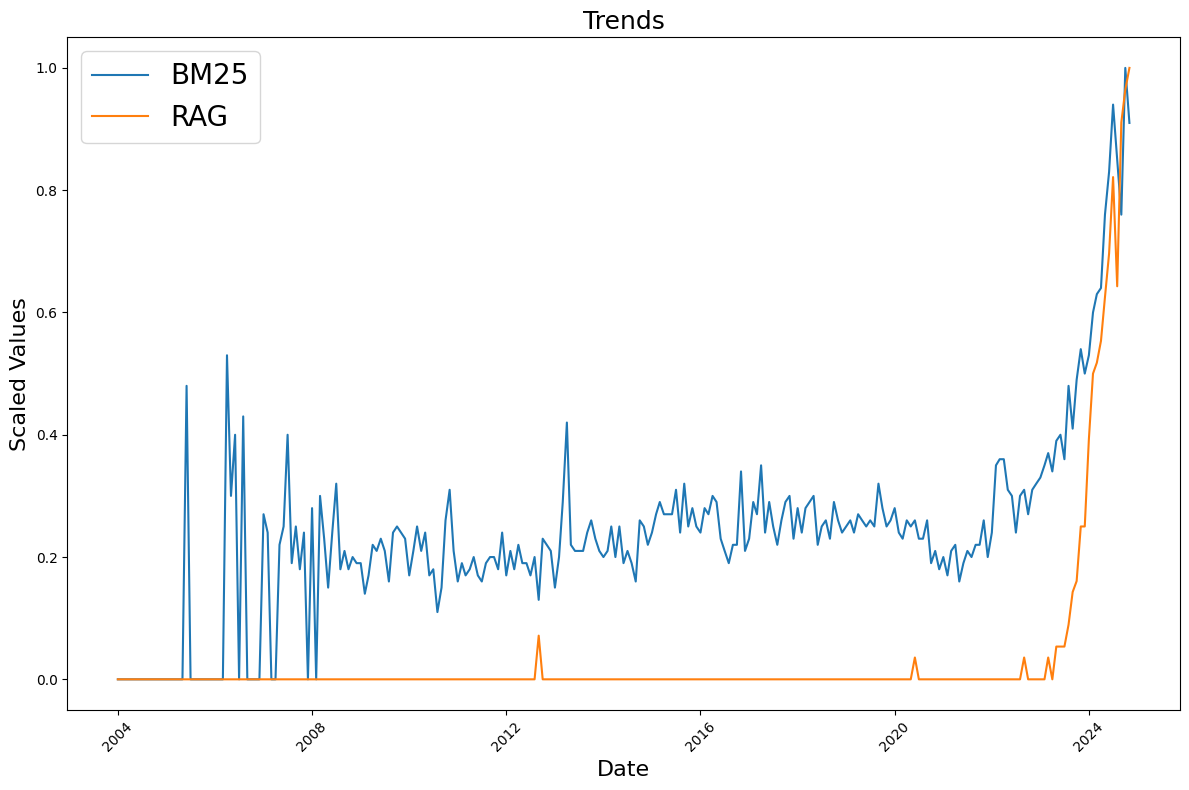

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
file_path = "/Users/rodolfocacacho/Documents/Documents/MAI/Master Thesis/Code/rag_clean_v2/data/extra/multiTimeline-2.csv"  # Replace with your CSV file path
data = pd.read_csv(file_path,skiprows=1)

# Assuming the CSV has columns: 'date', 'value1', 'value2'
data['Month'] = pd.to_datetime(data['Month'])  # Convert date to datetime
data.set_index('Month', inplace=True)

# Scale the values
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(data[['bm25: (Worldwide)', 'Retrieval-augmented generation: (Worldwide)']])
data['value1_scaled'], data['value2_scaled'] = scaled_values.T

# Plot the trends
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['value1_scaled'], label='BM25')  # Removed marker
plt.plot(data.index, data['value2_scaled'], label='RAG')  # Removed marker

# Customize the plot
plt.title('Trends', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Scaled Values', fontsize=16)
plt.legend(fontsize=20)  # Adjust the legend size
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

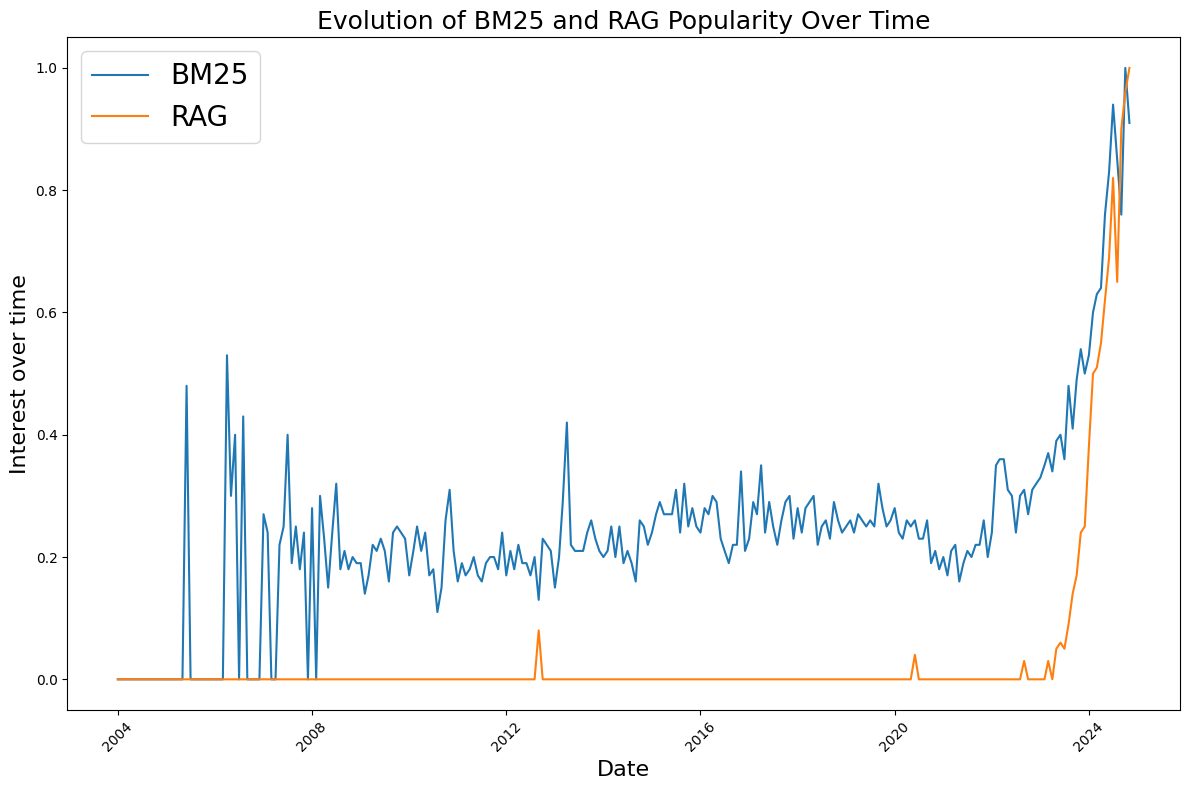

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# File paths
file1 = "/Users/rodolfocacacho/Documents/Documents/MAI/Master Thesis/Code/rag_clean_v2/data/extra/multiTimeline-4.csv"  # Replace with your CSV file path
file2 = "/Users/rodolfocacacho/Documents/Documents/MAI/Master Thesis/Code/rag_clean_v2/data/extra/multiTimeline-5.csv"  # Replace with your CSV file path

# Read the data
data1 = pd.read_csv(file1,skiprows=1)
data2 = pd.read_csv(file2,skiprows=1)

# Ensure the date columns are in datetime format
data1['Month'] = pd.to_datetime(data1['Month'])  # Adjust column name if needed
data2['Month'] = pd.to_datetime(data2['Month'])  # Adjust column name if needed

# Merge the data on 'Month' (or adjust if your column names differ)
merged_data = pd.merge(data1, data2, on='Month')

# Select and scale the values for plotting
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(merged_data[['bm25: (Worldwide)', 'Retrieval-augmented generation: (Worldwide)']])  # Adjust column names
merged_data['value1_scaled'], merged_data['value2_scaled'] = scaled_values.T

# Plot the trends
plt.figure(figsize=(12, 8))
plt.plot(merged_data['Month'], merged_data['value1_scaled'], label='BM25')  # Smooth line
plt.plot(merged_data['Month'], merged_data['value2_scaled'], label='RAG')  # Smooth line

# Customize the plot
plt.title('Evolution of BM25 and RAG Popularity Over Time', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Interest over time', fontsize=16)
plt.legend(fontsize=20)  # Adjust the legend size
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()